# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
This Jupyter notebook is an exploration of the "Ford GoBike" data set.
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.[3] Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company.
[Bay Wheels (Ford GoBike)](https://en.wikipedia.org/wiki/Bay_Wheels)


>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling



In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
bike_rides = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_rides.info()
bike_rides.describe()
bike_rides.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
17429,104,2019-02-27 06:39:32.5020,2019-02-27 06:41:17.1420,138.0,Jersey St at Church St,37.750900,-122.427411,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,5911,Subscriber,1984.0,Male,No
181689,493,2019-02-01 08:57:31.3760,2019-02-01 09:05:45.0330,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,77.0,11th St at Natoma St,37.773507,-122.416040,5359,Subscriber,1965.0,Male,No
113335,2672,2019-02-12 11:53:17.7140,2019-02-12 12:37:50.5830,47.0,4th St at Harrison St,37.780955,-122.399749,80.0,Townsend St at 5th St,37.775235,-122.397437,5222,Subscriber,1989.0,Male,No
84378,605,2019-02-17 17:51:59.4840,2019-02-17 18:02:04.4850,144.0,Precita Park,37.747300,-122.411403,120.0,Mission Dolores Park,37.761420,-122.426435,5013,Subscriber,1990.0,Male,No
144709,315,2019-02-07 11:24:02.0790,2019-02-07 11:29:17.2070,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,3067,Subscriber,NaN,NaN,No


### What is the structure of your dataset?

This dataset contains 183,413 records of rides/uses of the Ford GoBike System. 

It covers time related data in these columns:
`duration_sec, start_time, end_time`

Location data:
`start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude`

Bike identification:
`bike_id`

And user information:
`user_type, member_birth_year, member_gender`


### What is/are the main feature(s) of interest in your dataset?

* Peak times - are there any identifiable trends in the start/end times?
* Start/End Stations - are there trends in where the bikes are picked up and dropped of off? Could there be a relationship with the time of day. 
* Membership status - do the users tend to be subscribers, or one off customers? Are there any relationships to be seen between the membertype and peak times, or start/end stations?
* Bike_ID - Are there any bikes that have happen to have been used more? Could this be used for a planned maintenance schedule, or could the milage infer anything else? 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* Peak times - supported by time data: `duration_sec, start_time, end_time`
* Start/End Stations - supported by location data : `start_station_id, start_station_name, end_station_id, end_station_name`
* Membership status - supported by user information: `user_type, member_birth_year, member_gender`
* Bike ID: `bike_id`





## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Univariate exploration of time data

In [4]:
#need to set appropriate datatypes to 'start_time', 'end_time'
def stamp_to_seconds(stamp, reverse = False):
    if not reverse:
        val = (stamp.time().hour * 3600 +
            stamp.time().minute * 60 + 
            stamp.time().second)        
    else:
        val = datetime.timedelta(seconds=stamp)
    return (val)

bike_rides.start_time = pd.to_datetime(bike_rides.start_time)
bike_rides.end_time = pd.to_datetime(bike_rides.end_time)
bike_rides['start_tod_sec'] = bike_rides.start_time.apply(stamp_to_seconds)
bike_rides['end_tod_sec'] = bike_rides.end_time.apply(stamp_to_seconds)



bike_rides.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_tod_sec,end_tod_sec
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,50246.964621,50822.799304
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,16970.953466,17028.040036
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,1.000000,0.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,33825.000000,34389.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,52153.500000,52910.500000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,64164.000000,64800.250000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,86398.000000,86395.000000


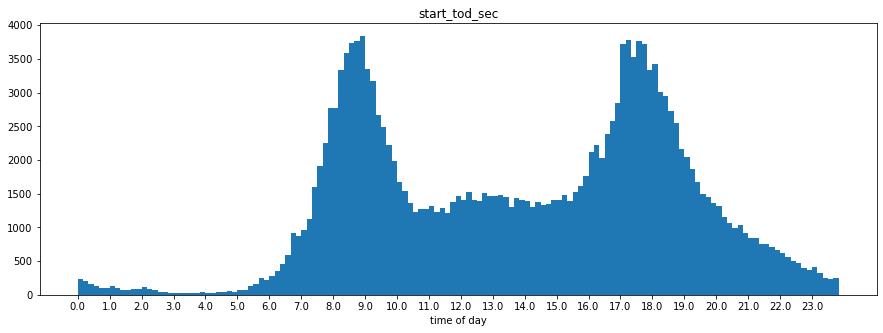

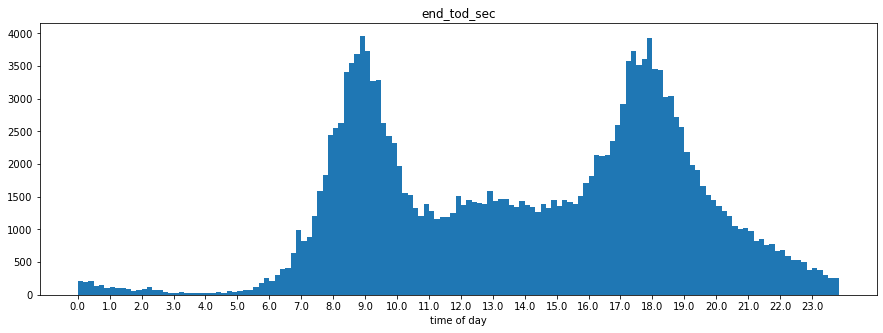

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
[2.00000e-02 3.00000e-02 7.00000e-02 1.30000e-01 2.70000e-01 5.30000e-01
 1.07000e+00 2.13000e+00 4.27000e+00 8.53000e+00 1.70700e+01 3.41300e+01
 6.82700e+01 1.36530e+02 2.73070e+02 5.46130e+02 1.09227e+03 2.18453e+03]


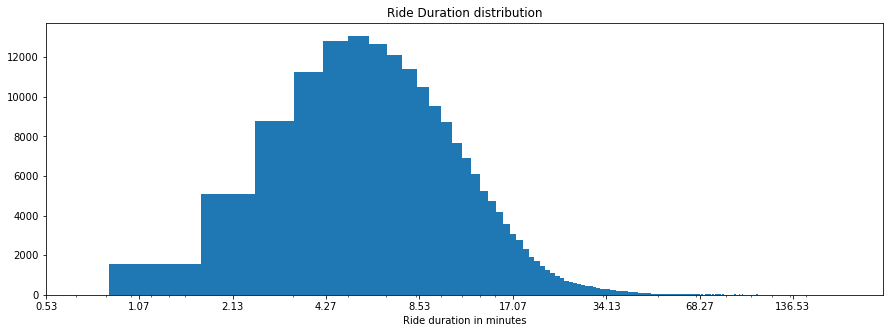

In [5]:
import datetime


def log_ticker(start, stop):    
    ticks = [start]
    while ticks[-1] < stop:
        ticks.append(ticks[-1] * 2)
    return ticks




times = ['start_tod_sec', 'end_tod_sec']

#plotting the start/end time (of day) distribution
x_ticks = np.arange(0, 86400, 3600)
for time in times:      
    plt.figure(figsize=(15, 5))
    bins = np.arange(1, 86400, 600)
    plt.hist(bike_rides[time],
        bins=bins)
    plt.xticks(x_ticks, x_ticks/3600)
    plt.title(time)
    plt.xlabel('time of day')

    
    plt.show();

#plotting the duration distribution
plt.figure(figsize=(15, 5))
x_ticks = log_ticker(1, bike_rides.duration_sec.max())
X_tick_labels = (np.array(x_ticks) / 60).round(2)
print(x_ticks)
print(X_tick_labels)
plt.hist(bike_rides.duration_sec,
    bins = np.arange(1, bike_rides.duration_sec.max(), 50))
plt.xscale('log')
plt.xticks(x_ticks, labels=X_tick_labels)
plt.xlim(32, 16000)
plt.title('Ride Duration distribution')
plt.xlabel('Ride duration in minutes')
plt.show();




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

>**Notes**: The start/end time distribution histograms show that the peaks times are roughly the same, which can be explained by most ride duration centering at around 6 minutes rather than representing something like we might expect from a round trip commute. The ride duration was best expressed with a log transformation.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Univariate exploration of users

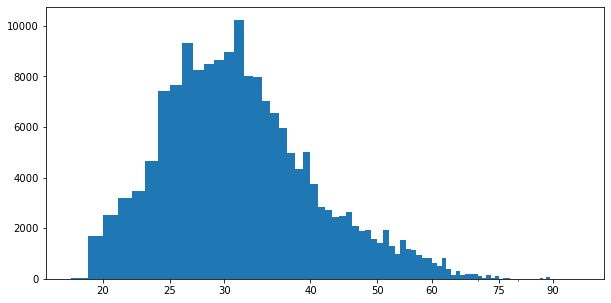

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_tod_sec,end_tod_sec,member_age_rough
count,183340.000000,183143.000000,183340.000000,183340.000000,183143.000000,183340.000000,183340.000000,183340.000000,175075.000000,183340.000000,183340.000000,175075.000000
mean,726.105814,138.567731,37.771211,-122.352663,136.247157,37.771414,-122.352250,4472.865845,1984.841222,50246.957031,50822.759883,34.158778
std,1794.717322,111.767307,0.099597,0.117110,111.512559,0.099506,0.116688,1664.394330,9.972079,16971.301491,17028.461039,9.972079
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1920.000000,1.000000,0.000000,18.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,33825.000000,34389.750000,27.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,52152.000000,52910.000000,32.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,64163.250000,64800.000000,39.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,86398.000000,86395.000000,99.000000


In [6]:
#there are some rows with no user data at all, and some seem to have bogus years of birth based on the assumption that 142 year olds aren't renting bicycles.
#we will visualize from a pruned user data subset.

bike_rides.drop(bike_rides[bike_rides['member_birth_year'] < 1918].index, inplace = True)
bike_rides['member_age_rough'] = 2019 - bike_rides.member_birth_year

x_ticks = [20, 25, 30, 40, 50, 60, 75, 90]

bins = np.arange(bike_rides.member_age_rough.min(),
    bike_rides.member_age_rough.max(),
    1)


plt.figure(figsize=(10,5))
plt.hist(bike_rides.member_age_rough,
    bins=bins)
plt.xscale('log')
plt.xticks(x_ticks, labels=x_ticks)
plt.show();

display(bike_rides.describe())



>**Notes**: A temporary dataframe called 'member_rides' was created, dropping records of members with a birth year prior to 1918, and creating a new column "member_age_rough". 
The riders mean age appears to be around 34, and the number of riders sharply drops off from there. 
The histogram of birth years was best expressed with a log scale.


### Univariate exploration of bikes


In [7]:
#create bike stats df bike_data
bike_data = pd.DataFrame()
bike_data['total_usage_time'] = bike_rides.copy().groupby('bike_id').sum()['duration_sec']
bike_data['ride_count'] = bike_rides.bike_id.value_counts()
bike_data['average_ride_duration'] = bike_rides.copy().groupby('bike_id').mean()['duration_sec']
bike_data.describe()

,total_usage_time,ride_count,average_ride_duration
count,4646.000000,4646.000000,4646.000000
mean,28653.517004,39.461903,760.747063
std,29855.316681,38.041892,1033.308554
min,76.000000,1.000000,76.000000
25%,6748.500000,12.000000,524.786721
50%,18089.000000,26.000000,642.821053
75%,40449.500000,55.000000,759.789474
max,217614.000000,191.000000,42656.000000


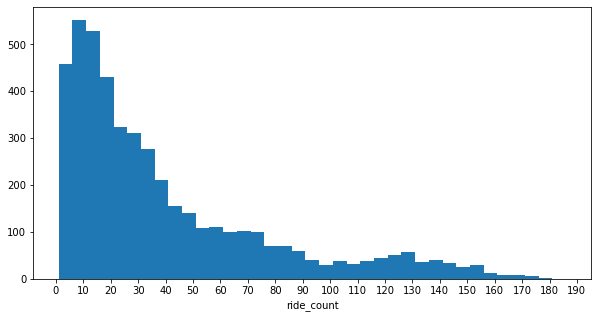

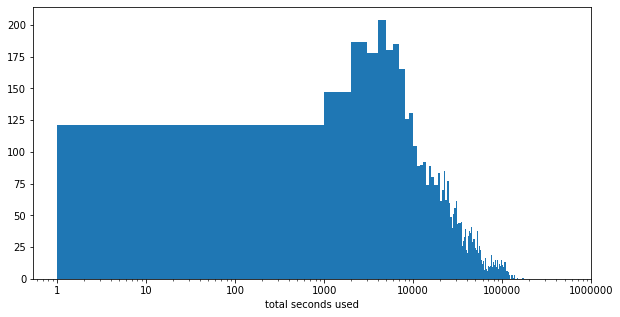

(100.0, 1873.7386363636365)

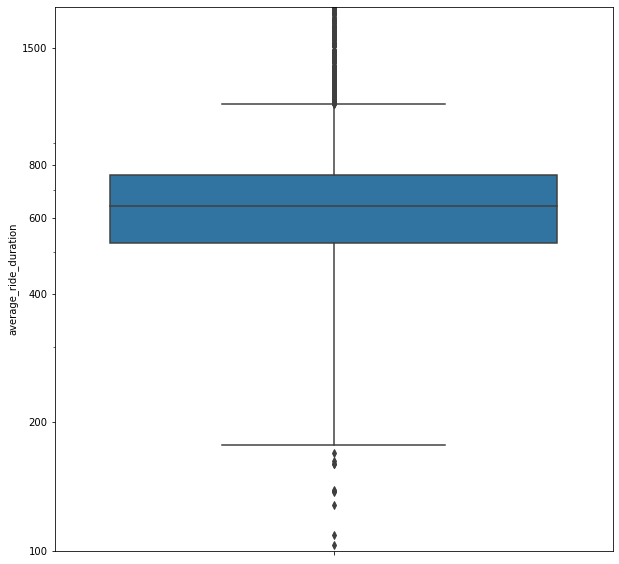

In [8]:
plt.figure(figsize=(10,5))
bins = np.arange(1, bike_data.ride_count.max(), 5)
plt.hist(data = bike_data, 
    x = 'ride_count',
    bins=bins)
plt.xticks(np.arange(0, bike_data.ride_count.max(), 10))
plt.xlabel('ride_count')
plt.show();


bins = np.arange(1, bike_data.total_usage_time.max(), 1000)
plt.figure(figsize=(10,5))
plt.hist(data = bike_data, 
    x = 'total_usage_time',
    bins=bins)
plt.xscale('log')
x_ticks = [int(x) for x in plt.xticks()[0]]
plt.xticks(x_ticks[2:-1], labels=x_ticks[2:-1])
plt.xlabel('total seconds used')
plt.show();



plt.figure(figsize=(10,10))
y_ticks = [100, 200, 400,600,800,1500,3000, 10000, 20000, 40000]
sb.boxplot(data = bike_data, y='average_ride_duration')
plt.yscale('log')
plt.yticks(y_ticks, labels=y_ticks)
plt.ylim(100,
    bike_data.average_ride_duration.quantile(0.975))



>**Notes**: Considering the short time frame of the data, these bikes are seeing a lot of use. On average, they've had 40 rides each at an average ride duration of 750 seconds (which seems short), to a total average of 30000 seconds usage each.
For bike data, a seperate dataframe was created indexed with the bike_id; this dataframe contains the total uses, total duration used, and average duration. Total seconds used and average ride duration have been expressed with a log scale.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The start/end time distribution histograms show that the peaks times are roughly the same, which can be explained by most ride duration centering at around 6 minutes rather than representing something like we might expect from a round trip commute. The ride duration was best expressed with a log transformation.

A temporary dataframe called 'member_rides' was created, dropping records of members with a birth year prior to 1918, and creating a new column "member_age_rough". 
The riders mean age appears to be around 34, and the number of riders sharply drops off from there. 
The histogram of birth years was best expressed with a log scale.

Considering the short time frame of the data, these bikes are seeing a lot of use. On average, they've had 40 rides each at an average ride duration of 750 seconds (which seems short), to a total average of 30000 seconds usage each.
For bike data, a seperate dataframe was created indexed with the bike_id; this dataframe contains the total uses, total duration used, and average duration. Total seconds used and average ride duration have been expressed with a log scale.




## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).


### Bivariate exploration: duration vs start time

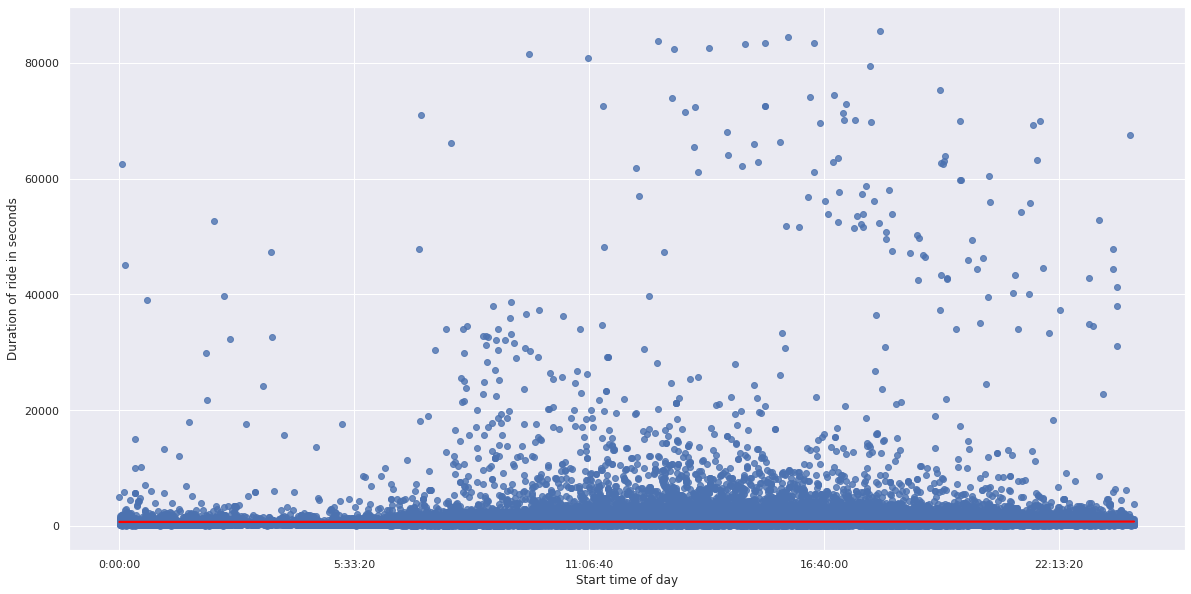

In [9]:

sb.set()
plt.figure(figsize=(20,10))
sb.regplot(data=bike_rides, x='start_tod_sec', y='duration_sec', line_kws={'color':'red'})
x_ticks = plt.xticks()[0][1:-1]
x_tick_labels = ([stamp_to_seconds(tick, reverse=True) for tick in plt.xticks()[0][1:-1]])
#plt.yscale('log')
plt.xticks(x_ticks, labels=x_tick_labels)
plt.xlabel('Start time of day')
plt.ylabel('Duration of ride in seconds');


> ***Note***: It looks like there isn't any relationship betweeen the total duration of the rides and the start time.

### Bivariate Exploration: Day of Week vs Duration

In [10]:
#creating a categorical day of week column
bike_rides['day_of_week'] = pd.Categorical.from_codes(bike_rides.start_time.dt.day_of_week,
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])



NameError: name 'titles' is not defined

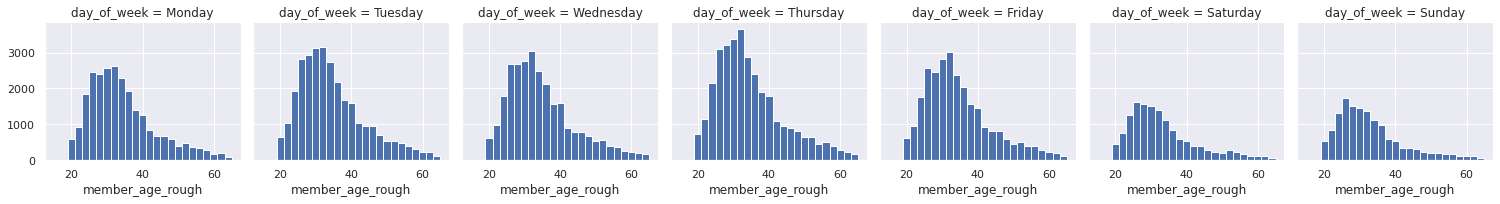

In [11]:
g = sb.FacetGrid(data=bike_rides, col='day_of_week')
g.map(plt.hist, 'member_age_rough', bins=np.arange(15,66,2))
axes = g.axes.flatten()
x_ticks = np.arange(15, 66, 10)
for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks)
    ax.set_xlabel('age')

>***Notes***: the riders are concetrated in the 20-40 range on each day, but Saturday/Sunday there are fewer riders in general, reducing the skew slightly.

### Bivariate Exploration: Gender vs Duration

<AxesSubplot:xlabel='duration_sec', ylabel='member_gender'>

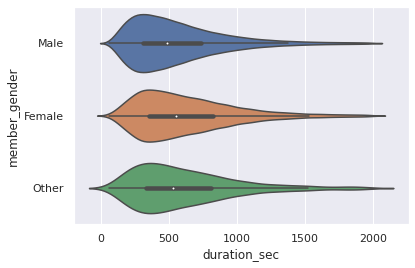

In [ ]:
sb.violinplot(data = bike_rides[bike_rides['duration_sec'] < 2000], x='duration_sec', y='member_gender')


>***Notes***: This is not very interesting at all.

### Bivariate Exploration: Gender vs start time of day

<AxesSubplot:xlabel='start_tod_sec', ylabel='member_gender'>

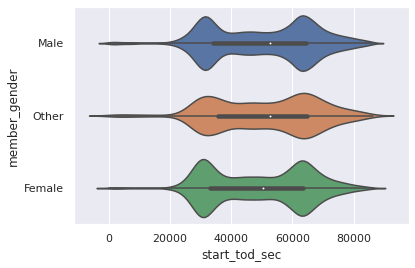

In [ ]:
sb.violinplot(data = bike_rides, x='start_tod_sec', y='member_gender')


>***Notes***: The other gendered have a slightly more spread out distribution on the start time of day.

### Bivariate Exploration: Gender vs Age

(15.0, 70.0)

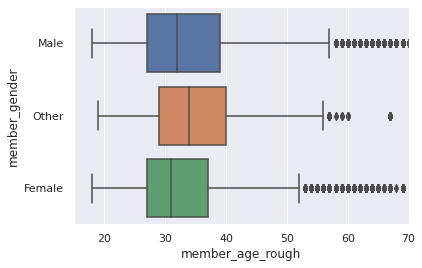

In [ ]:
sb.boxplot(data = bike_rides, x='member_age_rough', y='member_gender')
plt.xlim(15, 70)


>***Notes***: The other gendered riders tend to be slightly older.

### Bivariate Exploration: User type vs duration

<AxesSubplot:xlabel='duration_sec', ylabel='user_type'>

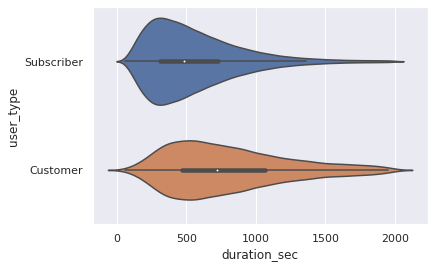

In [ ]:
sb.violinplot(data = bike_rides[bike_rides['duration_sec'] < 2000], x='duration_sec', y='user_type')

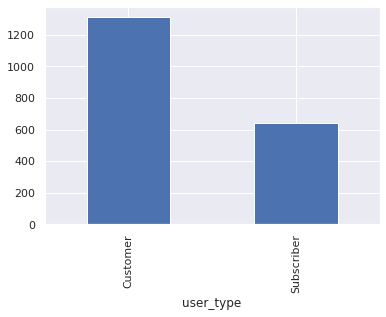

In [ ]:
bike_rides.groupby('user_type')['duration_sec'].mean().plot(kind='bar');

>***Notes***: Non-subscriber type customers tend to go on significantly longer rides. 

### Bivariate Exploration: User type vs start time

<Figure size 720x360 with 0 Axes>

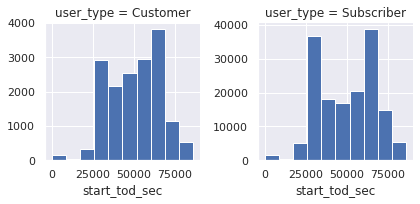

In [ ]:

plt.figure(figsize=(10,5))
g = sb.FacetGrid(data = bike_rides, col = 'user_type', sharey=False)
g.map(plt.hist, 'start_tod_sec')



***Notes:*** Non-subscriber customer tend share the same peak times with subscribers, but it tends to be a bit more spread out.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* We didn't find any relationship between the total duration of the rides and the start time.
* The riders are concetrated in the 20-40 range on each day, but Saturday/Sunday there are fewer riders in general, reducing the skew slightly.
* Other gendered riders tend to have just slightly longer rides, a slightly more evenly distribution of ride start time, and tend to be a little bit older than male/female.
* Non subscribers go for significantly longer rides on average, and have a more even distribution for their start time of day.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No, relationships were difficult to find for me in this dataset.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Multivariate Exploration: Duration vs start time by user type

TypeError: cannot perform reduce with flexible type

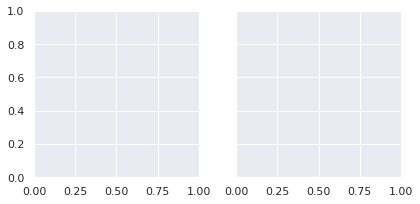

In [ ]:
g = sb.FacetGrid(data = bike_rides, col = 'user_type')
g.map(plt.hist2d, x='start_tod_sec', y='duration_sec')

In [29]:
bike_rides['start_hour'] = bike_rides.start_time.dt.hour


df_duration_by_hour_day = bike_rides.copy()[['start_hour', 'day_of_week', 'duration_sec', 'user_type']]
df_duration_by_hour_day = df_duration_by_hour_day.groupby(['start_hour', 'day_of_week']).mean().unstack('start_hour')
df_duration_by_hour_day['duration_sec'] = df_duration_by_hour_day.duration_sec.round().astype('int')

plt.figure(figsize = (20, 10))
sb.heatmap(df_duration_by_hour_day[df_duration_by_hour_day['user_type'] = 'customer'], cmap='rocket_r', annot = True, fmt='g')
x_ticks = (np.arange(0, 24, 1))
plt.xticks(x_ticks, labels=x_ticks)
plt.xlabel('Hour of day starting the ride');


SyntaxError: invalid syntax (234128524.py, line 9)

In [ ]:
bike_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174880 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174880 non-null  int64         
 1   start_time               174880 non-null  datetime64[ns]
 2   end_time                 174880 non-null  datetime64[ns]
 3   start_station_id         174880 non-null  float64       
 4   start_station_name       174880 non-null  object        
 5   start_station_latitude   174880 non-null  float64       
 6   start_station_longitude  174880 non-null  float64       
 7   end_station_id           174880 non-null  float64       
 8   end_station_name         174880 non-null  object        
 9   end_station_latitude     174880 non-null  float64       
 10  end_station_longitude    174880 non-null  float64       
 11  bike_id                  174880 non-null  int64         
 12  user_type       

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

